### Data
Interannual variability in water availability <br>
Dataset ID `98b8e4f5-d961-463a-8732-7116de16808c` <br>

In [1]:
import numpy as np
import vega
import json
from vega import Vega

### Template specification
(for WPS Global Tool backoffice; cannot be created directly)

In [ ]:
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 300,
  "height": 300,
  "autosize": {
    "type": "none",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {"name": "center", "update": "width / 2"}
  ],
  "data": [
    {
      "name": "widget_datapoints",
      "urlTemplate": "/api/v1/widget_datapoints/${region.gid_2}/iav/",
      "format": {
        "property": "widget_datapoints",
        "type": "json",
        "parse": {
          "month_indep": "date:'%Y-%m-%d'"
        }
      },
      "transform": [
        {
          "type": "aggregate",
          "fields": ["gid_2", "iav"],
          "ops": ["max", "max"],
          "as": ["max_month", "max_iav"]
        },
        {
          "type": "formula",
          "as": "formatted",
          "expr": "(datum.max_iav<1?'Low':(datum.max_iav<2?'Low-medium':(datum.max_iav<3?'Medium-high':(datum.max_iav<4?'High':'Extremely high'))))"
        }
      ]
    }
  ],
  "encode": {
    "enter": {
      "x": {"signal": "center"},
      "y": {"signal": "center"}
    }
  },

  "marks": [
    {
      "type": "text",
      "name": "my-label1",
      "zindex": 1,
      "encode": {
        "enter": {
          "x": {"signal": "0"},
          "y": {"signal": "20"},
          "text": {"value": "Interannual variability"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "black"},
          "fontWeight": {"value": "bold"},
          "fontSize": {"value": 20}
        }
      }
    },
    {
      "type": "text",
      "name": "my-label2",
      "zindex": 1,
      "encode": {
        "enter": {
          "x": {"signal": "0"},
          "y": {"signal": "45"},
          "text": {"value": "in water availability"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "black"},
          "fontWeight": {"value": "bold"},
          "fontSize": {"value": 20}
        }
      }
    },
    {
      "type": "text",
      "name": "my-value",
      "from": {"data": "widget_datapoints"},
      "zindex": 1,
      "encode": {
        "enter": {
          "x": {"signal": "0"},
          "y": {"signal": "-20"},
          "text": {"field": "formatted"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "black"},
          "fontWeight": {"value": "bold"},
          "fontSize": {"value": 40}
        }
      }
    }
  ]
}

### Stand-alone specification
(eg for use with https://vega.github.io/editor/#/)

Preview region `ETH.1.1_1` <br>
url `https://waterpeacesecurity.org/api/v1/widget_datapoints/ETH.1.1_1/iav/` <br>

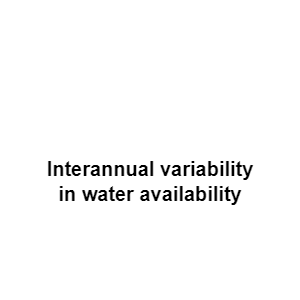

In [2]:
specV5=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "width": 300,
  "height": 300,
  "autosize": {
    "type": "none",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {"name": "center", "update": "width / 2"}
  ],
  "data": [
    {
      "name": "widget_datapoints",
      "url": "https://waterpeacesecurity.org/api/v1/widget_datapoints/ETH.1.1_1/iav/",
      "format": {
        "property": "widget_datapoints",
        "type": "json",
        "parse": {
          "month_indep": "date:'%Y-%m-%d'"
        }
      },
      "transform": [
        {
          "type": "aggregate",
          "fields": ["gid_2", "iav"],
          "ops": ["max", "max"],
          "as": ["max_month", "max_iav"]
        },
        {
          "type": "formula",
          "as": "formatted",
          "expr": "(datum.max_iav<1?'Low':(datum.max_iav<2?'Low-medium':(datum.max_iav<3?'Medium-high':(datum.max_iav<4?'High':'Extremely high'))))"
        }
      ]
    }
  ],
  "encode": {
    "enter": {
      "x": {"signal": "center"},
      "y": {"signal": "center"}
    }
  },

  "marks": [
    {
      "type": "text",
      "name": "my-label1",
      "zindex": 1,
      "encode": {
        "enter": {
          "x": {"signal": "0"},
          "y": {"signal": "20"},
          "text": {"value": "Interannual variability"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "black"},
          "fontWeight": {"value": "bold"},
          "fontSize": {"value": 20}
        }
      }
    },
    {
      "type": "text",
      "name": "my-label2",
      "zindex": 1,
      "encode": {
        "enter": {
          "x": {"signal": "0"},
          "y": {"signal": "45"},
          "text": {"value": "in water availability"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "black"},
          "fontWeight": {"value": "bold"},
          "fontSize": {"value": 20}
        }
      }
    },
    {
      "type": "text",
      "name": "my-value",
      "from": {"data": "widget_datapoints"},
      "zindex": 1,
      "encode": {
        "enter": {
          "x": {"signal": "0"},
          "y": {"signal": "-20"},
          "text": {"field": "formatted"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "black"},
          "fontWeight": {"value": "bold"},
          "fontSize": {"value": 40}
        }
      }
    }
  ]
}
""")
vega5view=dict(specV5)
Vega(vega5view)